### Statlog (Vehicle Silhouettes) Data Set

The purpose is to classify a given silhouette as one of four types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles. 


#### Attribute Information:

- COMPACTNESS	(average perim)**2/area 
- CIRCULARITY	(average radius)**2/area 
- DISTANCE CIRCULARITY	area/(av.distance from border)**2 
- RADIUS RATIO	(max.rad-min.rad)/av.radius 
- PR.AXIS ASPECT RATIO	(minor axis)/(major axis) 
- MAX.LENGTH ASPECT RATIO	(length perp. max length)/(max length) 
- SCATTER RATIO	(inertia about minor axis)/(inertia about major axis) 
- ELONGATEDNESS	area/(shrink width)**2 
- PR.AXIS RECTANGULARITY	area/(pr.axis length*pr.axis width) 
- MAX.LENGTH RECTANGULARITY area/(max.length*length perp. to this) 
- SCALED VARIANCE (2nd order moment about minor axis)/area ALONG MAJOR AXIS 
- SCALED VARIANCE (2nd order moment about major axis)/area ALONG MINOR AXIS 
- SCALED RADIUS OF GYRATION	(mavar+mivar)/area 
- SKEWNESS ABOUT (3rd order moment about major axis)/sigma_min**3 MAJOR AXIS 
- SKEWNESS ABOUT (3rd order moment about minor axis)/sigma_maj**3 MINOR AXIS 
- KURTOSIS ABOUT (4th order moment about major axis)/sigma_min**4 MINOR AXIS 
- KURTOSIS ABOUT (4th order moment about minor axis)/sigma_maj**4 MAJOR AXIS 
- HOLLOWS RATIO	(area of hollows)/(area of bounding polygon) 

    Where sigma_maj**2 is the variance along the major axis and sigma_min**2 is the variance along the minor axis, and area of hollows= area of bounding poly-area of object 

- NUMBER OF CLASSES - 3	CAR, BUS, VAN 

### Import necessary modules

In [1]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#!jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

from scipy.stats import zscore
from sklearn.decomposition import PCA


from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_nodeinteractivity = 'all'

#### Read the dataset and split into independent and dependents variables

In [2]:
df = pd.read_csv("vehicle.csv")
target = 'class'
X = df.loc[:, df.columns!=target]
y = df.loc[:, df.columns==target]

#### List first few rows of the dataset

In [3]:
X.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


#### View the descriptive statistics of the dataset using describe() function

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 18 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [5]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [6]:
def basic_details(df):
    b = pd.DataFrame()
    b['Missing value'] = df.isnull().sum()
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b

In [7]:
basic_details(X)

,Missing value,N unique value,dtype
compactness,0,44,int64
circularity,5,27,float64
distance_circularity,4,63,float64
radius_ratio,6,134,float64
pr.axis_aspect_ratio,2,37,float64
max.length_aspect_ratio,0,21,int64
scatter_ratio,1,131,float64
elongatedness,1,35,float64
pr.axis_rectangularity,3,13,float64
max.length_rectangularity,0,66,int64


#### Observations
- There are 19 columns and 846 rows in the dataset
- The target contains labels for three classes - car, bus and van
- All independent variables are numerical features
- There are missing values for few columns, we can impute those using mean and median values based on the skewness
- Most of the independents variables are distributed near to normal
- skewness_about and skewness_about.1 have min values as zero, probably they indicate missing values. It would require indepth domain knowledge to make this decision, we would leave these as is.

#### Lets look at the distribution plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E600E1E48>,
      dtype=object)

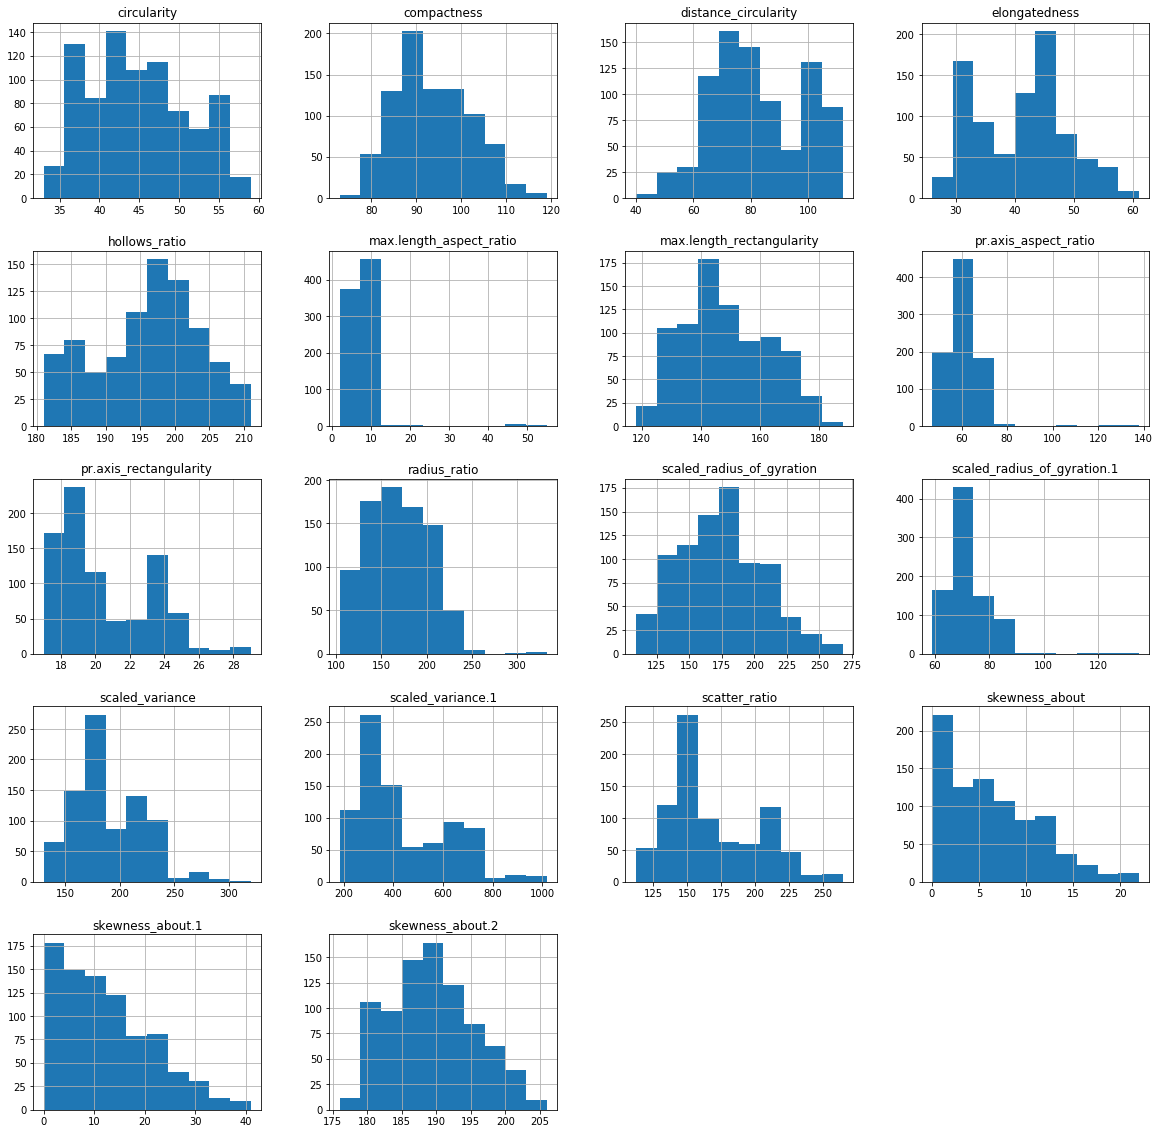

In [8]:
X.hist(figsize=(20,20))

#### Impute missing values with median

In [9]:
for i in list(X._get_numeric_data().columns):
    X[i].fillna(X[i].median(), inplace=True)

In [10]:
basic_details(X)

,Missing value,N unique value,dtype
compactness,0,44,int64
circularity,0,27,float64
distance_circularity,0,63,float64
radius_ratio,0,134,float64
pr.axis_aspect_ratio,0,37,float64
max.length_aspect_ratio,0,21,int64
scatter_ratio,0,131,float64
elongatedness,0,35,float64
pr.axis_rectangularity,0,13,float64
max.length_rectangularity,0,66,int64


#### Check how the target classes are distributed

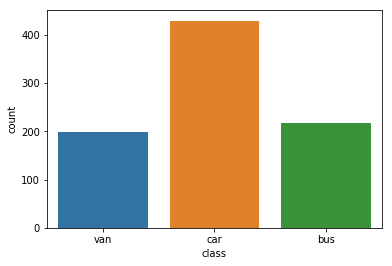

In [11]:
sns.countplot(x='class',data=y)

In [12]:
y['class'].value_counts()/y.shape[0] * 100

car    50.709220
bus    25.768322
van    23.522459
Name: class, dtype: float64

In [13]:
y['class'] = pd.Categorical(y['class']).codes

In [14]:
y['class'].value_counts()/y.shape[0] * 100

1    50.709220
0    25.768322
2    23.522459
Name: class, dtype: float64

There is a slight imbalance in the dataset, observations for 'car' class is higher compared to 'bus' and 'van'. Its good to have a balanced dataset for every class to avoid baised prediction. However, we will use the  dataset as is for this analysis and not use any balancing technique.

#### Bivariate analysis using pair plot and correlation matrix

In [15]:
def correlation_matrix(df):
    corrmat = df.corr()
    top_corr_features = corrmat.index
    plt.figure(figsize=(25,25))
    #plot heat map
    g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

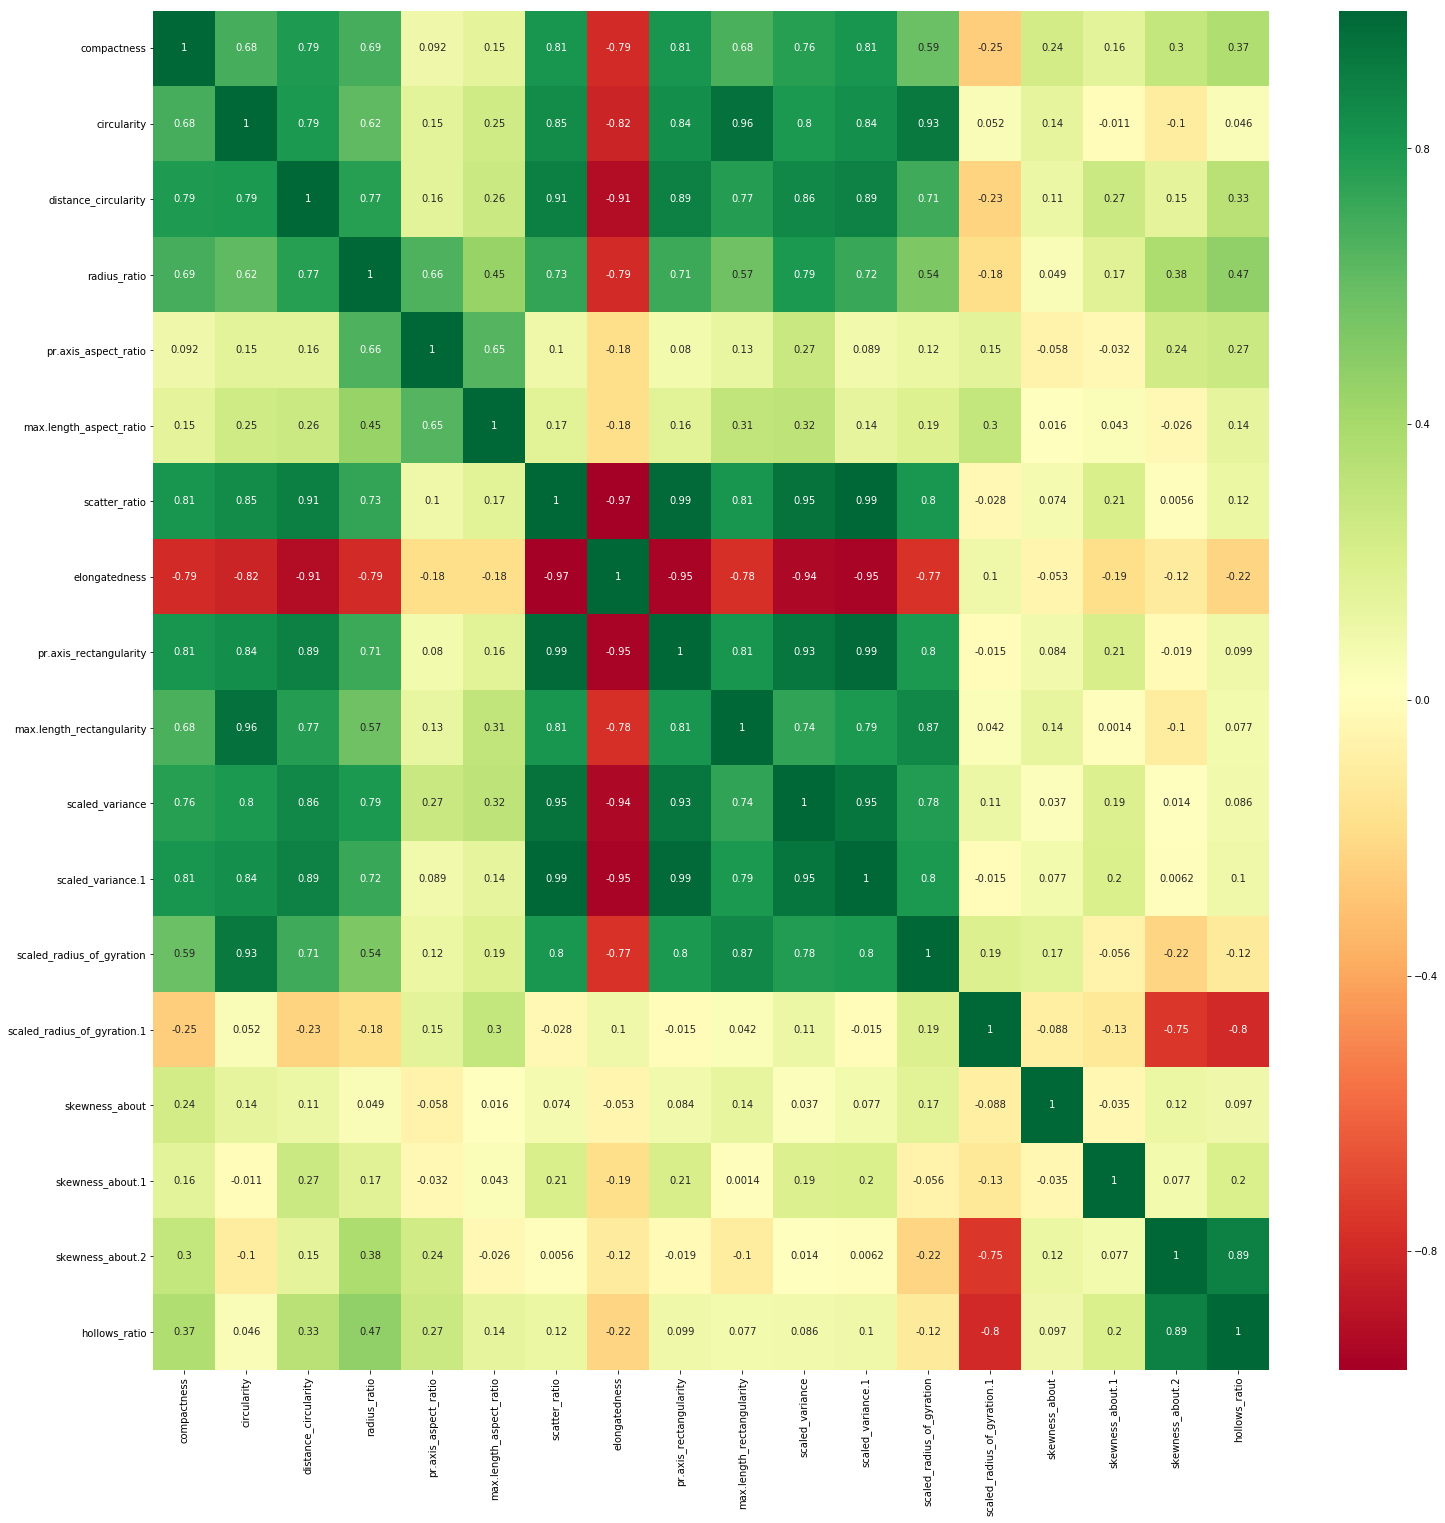

In [16]:
correlation_matrix(X)

- max.length_rectangularity is highly correlated with circularity (ρ = 0.96573) 
- scaled_radius_of_gyration is highly correlated with circularity (ρ = 0.93595) 
- scaled_variance is highly correlated with pr.axis_rectangularity (ρ = 0.93818) 
- scaled_variance.1 is highly correlated with scaled_variance (ρ = 0.94977) 
- scatter_ratio is highly correlated with scaled_variance.1 (ρ = 0.99633) 

Hence, these columns can be ignored while training the model as they are highly correlated with other variables

Following variables need to be considered for training the model

f_columns_ = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio',
       'elongatedness', 'pr.axis_rectangularity', 
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      

#### Below Dendrogram also depicts the same 

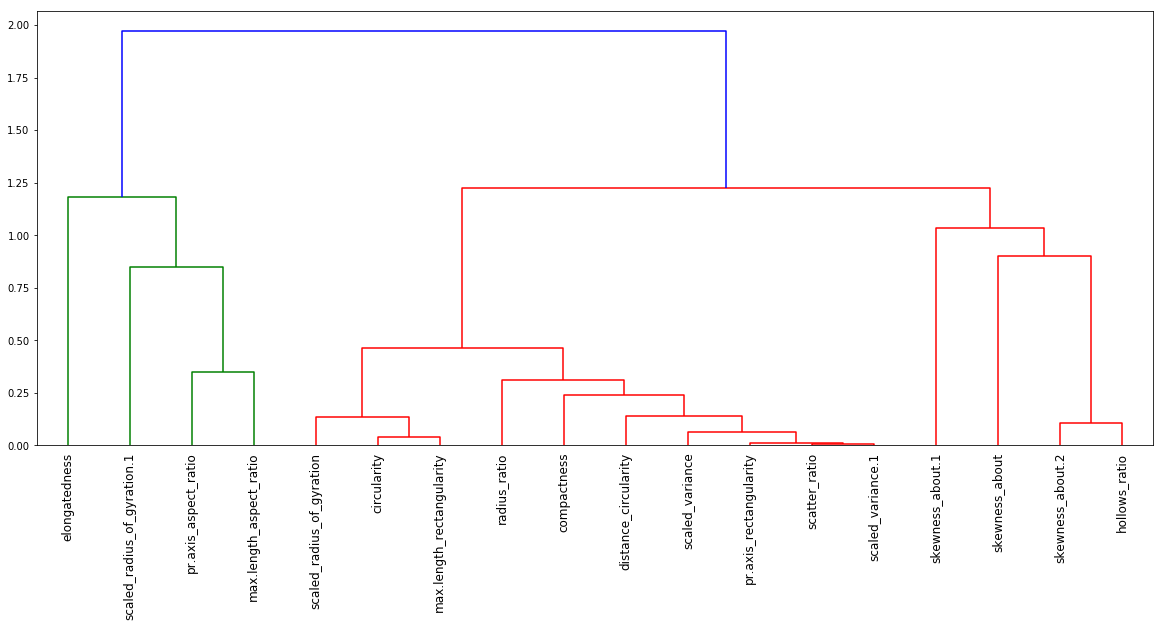

In [17]:
from scipy.cluster import hierarchy as hc

corr = 1 - X.corr() 
corr_condensed = hc.distance.squareform(corr) # convert to condensed
z = hc.linkage(corr_condensed, method='complete')
plt.figure(figsize=(20,8))
dendrogram = hc.dendrogram(z,labels=corr.columns,leaf_rotation =90)

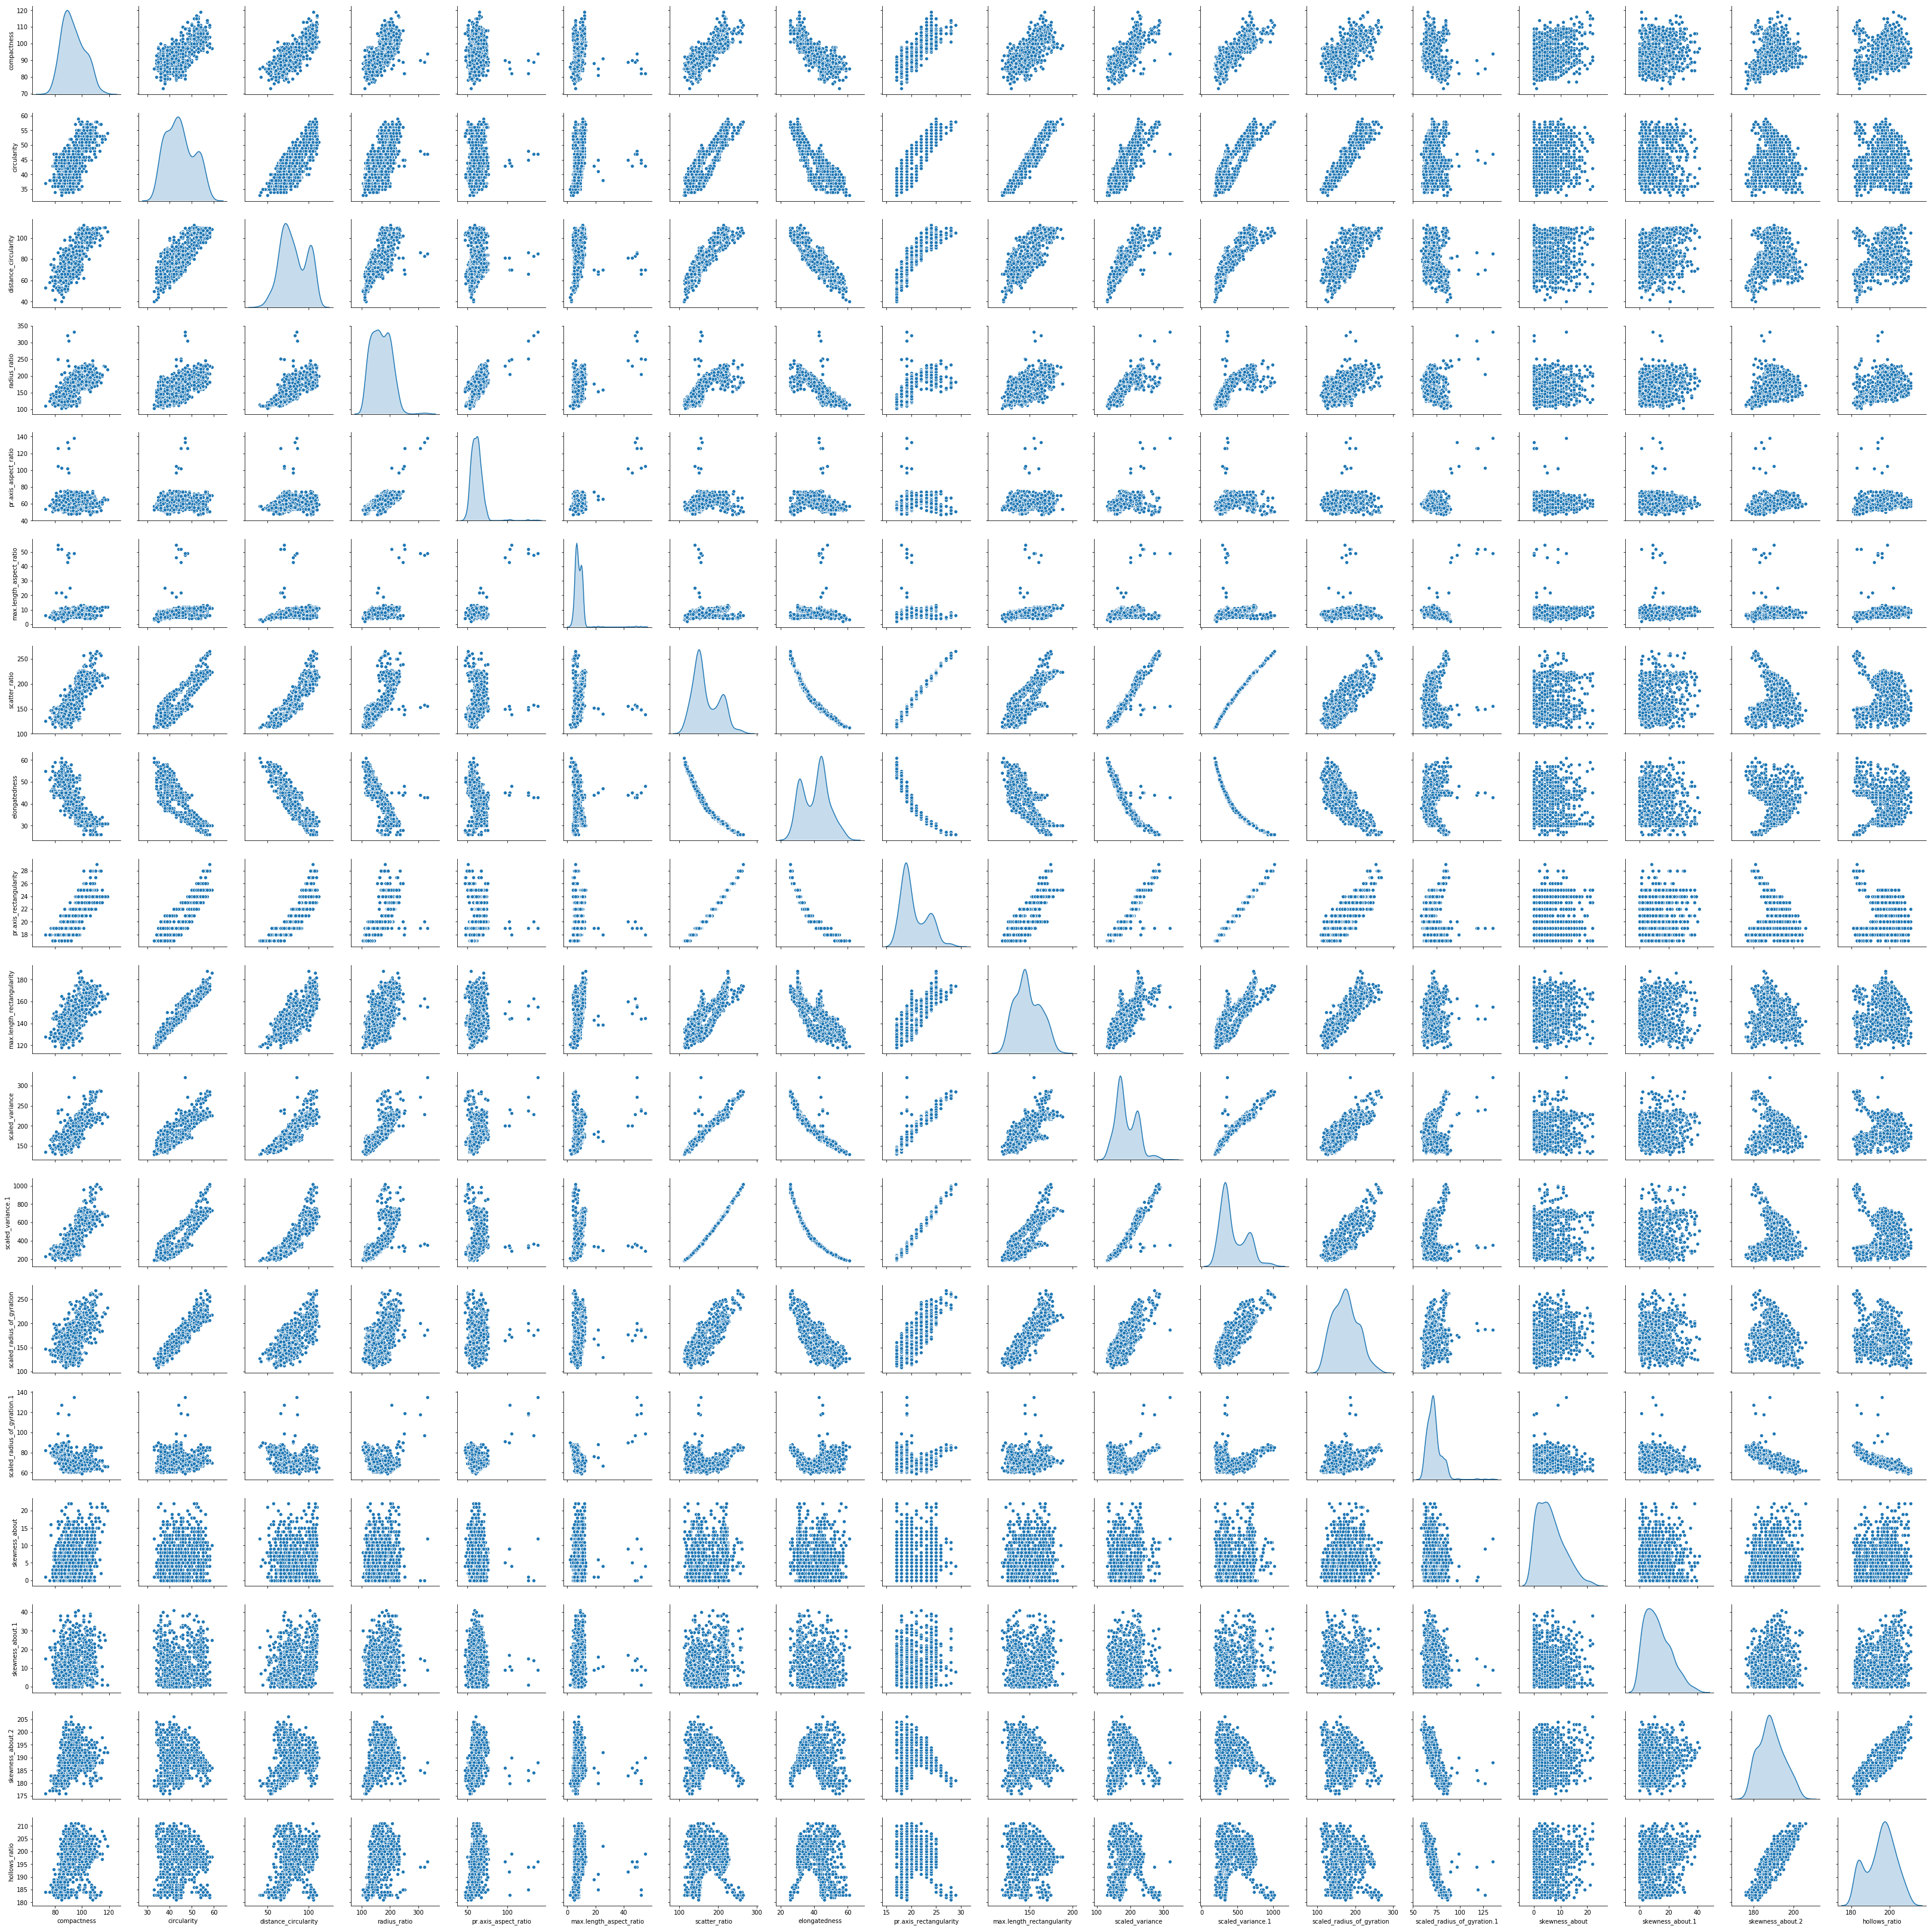

In [18]:
sns.pairplot(df,diag_kind='kde')

#### Observation
- Relationship between variables shows high correlation (positive and negative) between most of the variables.
- We can see outliers in the data

#### Oulier Detection

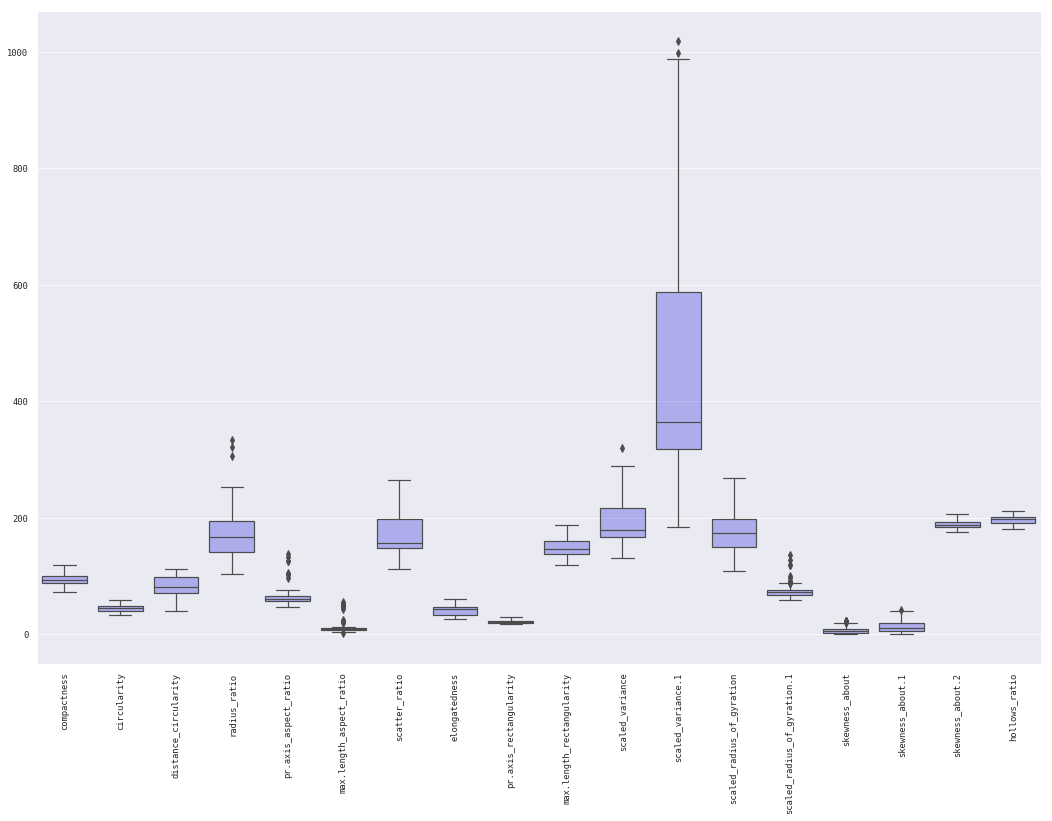

In [19]:
sns.set(context="paper", font="monospace")
# Create a figure instance
fig = plt.figure(1, figsize=(18, 12))

# Create an axes instance
ax = fig.add_subplot(111)

g = sns.boxplot(data=X, ax=ax, color="blue")
g.set_xticklabels(X.columns,rotation=90)

# Add transparency to colors
for patch in g.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))   
       


#### Impute outliers

The extreme observations in data set which resembles completely different behaviour from the rest of data point are called outliers. The outliers present in numeric feature can be dealt by following ways based on the domain knowledge
- delete the outliers (there could be loss of data due to this)
- impute ouliers with mean/median
- impute with lower and upper bound values. 

In our case we will replace the outliers by 1%/99% of feature value, this might not be the best approach.

In [20]:
def outlier(df,columns):
    for i in columns:
        quartile_1,quartile_3 = np.percentile(df[i],[25,75])
        quartile_f,quartile_l = np.percentile(df[i],[1,99])
        IQR = quartile_3-quartile_1
        lower_bound = quartile_1 - (1.5*IQR)
        upper_bound = quartile_3 + (1.5*IQR)
        print(i,lower_bound,upper_bound,quartile_f,quartile_l)
                
        df[i].loc[df[i] < lower_bound] = quartile_f
        df[i].loc[df[i] > upper_bound] = quartile_l    
        
outlier(X,X.columns)
 

compactness 67.5 119.5 79.0 113.0
circularity 26.5 62.5 34.0 57.0
distance_circularity 28.0 140.0 51.0 109.0
radius_ratio 60.0 276.0 111.0 234.54999999999995
pr.axis_aspect_ratio 45.0 77.0 49.45 75.54999999999995
max.length_aspect_ratio 2.5 14.5 4.0 23.649999999999864
scatter_ratio 70.5 274.5 116.0 253.64999999999986
elongatedness 13.5 65.5 26.0 57.549999999999955
pr.axis_rectangularity 13.0 29.0 17.0 28.0
max.length_rectangularity 104.0 192.0 122.0 178.0
scaled_variance 92.0 292.0 135.0 279.0999999999999
scaled_variance.1 -84.5 989.5 198.35 942.2999999999988
scaled_radius_of_gyration 75.5 271.5 116.0 254.0999999999999
scaled_radius_of_gyration.1 55.0 87.0 61.0 89.54999999999995
skewness_about -8.5 19.5 0.0 20.549999999999955
skewness_about.1 -16.0 40.0 0.0 37.09999999999991
skewness_about.2 170.5 206.5 178.0 203.0
hollows_ratio 174.125 217.125 182.0 210.0


#### Lets have a look at the box plot again after handling outliers.

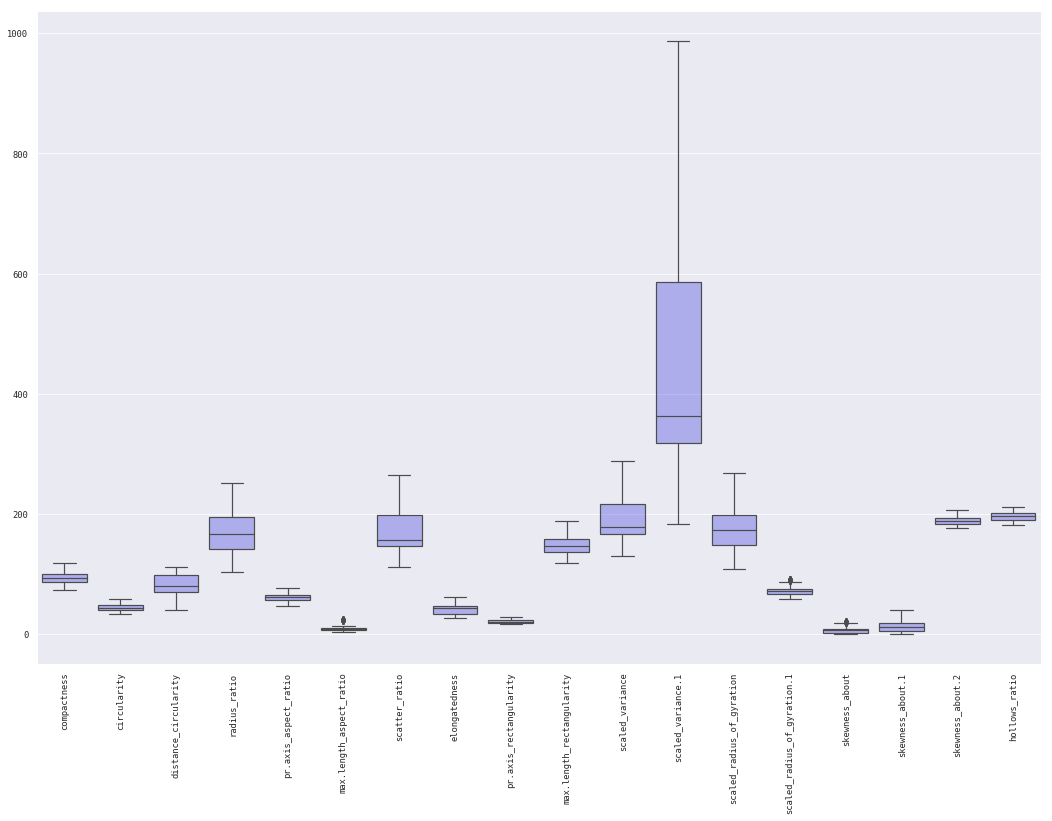

In [21]:
sns.set(context="paper", font="monospace")
# Create a figure instance
fig = plt.figure(1, figsize=(18, 12))

# Create an axes instance
ax = fig.add_subplot(111)

g = sns.boxplot(data=X, ax=ax, color="blue")
g.set_xticklabels(X.columns,rotation=90)

# Add transparency to colors
for patch in g.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3)) 

### Inference

From the above visual plots we can see that most of the variables are highly correlated. This correlation between variables brings about a redundancy in the information that can be gathered by the data set. Thus in order to reduce noise (which could lead to the computational complexities in huge datasets) , we will use PCA to transform the original variables to the linear combination of these variables which are independent. 

Based on the percentage of variation that we want to be captured in transformed data set, we will select the number of Principal Components to be considered.

#### Standardise the dataset using Standard Scalar

Whether to standardize the data prior to a PCA on the covariance matrix depends on the measurement scales of the original features. Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it measured on different scales. Let us transform data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

#### Eigendecomposition - Computing Eigenvectors and Eigenvalues using covariance matrix

<div class="alert alert-block alert-info"> The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the “core” of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.</div>


In [23]:
cov_mat1 = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

eig_vals.sum()

Eigenvectors 
[[-2.73659245e-01  9.62368925e-02 -1.50110684e-01 -1.73438920e-01
  -7.64799190e-02 -3.96076369e-02 -3.32412510e-01 -6.82211513e-01
  -4.07216723e-01  2.80830338e-01  6.34917650e-02  6.14529983e-02
  -1.18378298e-02 -1.34973017e-01 -7.62908893e-02  2.66435277e-03
   5.49305713e-02  1.43109830e-02]
 [-2.89814589e-01 -1.28191787e-01  1.52925214e-01 -1.29118466e-01
   2.60088959e-02 -1.26160911e-01  3.92439139e-01 -1.29284490e-01
   6.58820588e-03 -5.07845800e-02 -4.76857584e-02 -2.87283821e-01
  -1.14549533e-02  4.58068409e-02 -2.22478706e-01 -8.13124423e-02
  -1.87183989e-01  7.00996759e-01]
 [-3.03220331e-01  5.30650428e-02 -9.98326148e-02  1.87457071e-02
   8.81045256e-02 -8.68490587e-02 -1.05862158e-02  3.75869566e-01
  -2.76861635e-01  1.09700513e-01  7.52532781e-01 -1.80439839e-02
   7.20598520e-03  6.13174301e-02  2.21502411e-01  8.11329154e-03
  -1.67735771e-01  4.28309332e-02]
 [-2.72051437e-01  2.01824436e-01  1.78082498e-01  1.74125747e-01
  -5.79846533e-02  2.48

18.02130177514793

<div class="alert alert-block alert-info"> The typical goal of a PCA is to reduce the dimensionality of the original feature space by projecting it onto a smaller subspace, where the eigenvectors will form the axes. However, the eigenvectors only define the directions of the new axis. In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.</div>

#### Explained Variance

<div class="alert alert-block alert-info"> To decide "how many principal components are we going to choose for our new feature subspace?" A useful measure is the so-called “explained variance” which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.</div>

In [24]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 53.21103222  71.41050306  78.19862429  84.71706252  89.75414234
  93.77313535  95.96051947  97.19802753  98.0979925   98.63514784
  99.00347255  99.29217811  99.51017472  99.69060288  99.81516691
  99.92623238  99.98310318 100.        ]


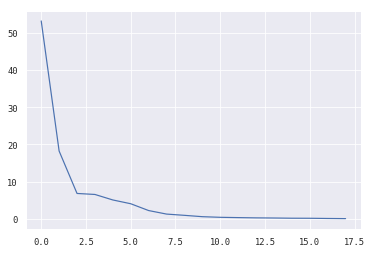

In [25]:
plt.plot(var_exp)

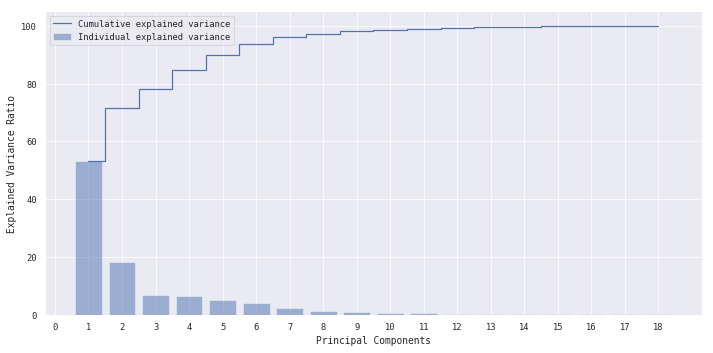

In [26]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.xticks(np.arange(19))
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

The plot above clearly shows that most of the variance (53.21% of the variance to be precise) can be explained by the first principal component, second principal component bears some information (18.2%) and so on.
Together, the first 7 principal components contain 95.96% of the information and first 8 principal components contain 97.19% of information. 
We can choose either 7 or 8 and sample ignore rest of the principal components

In [27]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 8 PCA dimensions (dimensionality reduction from 17 to 8)

pca = PCA(n_components=10)
data_reduced = pca.fit_transform(X_std)
data_reduced.transpose()

array([[ 0.47877102, -1.57906668,  3.84439877, ...,  4.96230557,
        -3.30298007, -4.88487976],
       [-0.58779774, -0.33976099,  0.18407394, ..., -0.11703698,
        -1.0403932 ,  0.41251757],
       [ 1.35598237, -0.49602455,  0.57970627, ...,  1.31956559,
        -1.36197926, -1.12346188],
       ...,
       [-0.48457693,  0.17748415,  0.37195089, ..., -0.14476684,
         0.42559936, -0.22792672],
       [-0.81534206,  0.0440285 , -0.28893804, ..., -0.64346111,
        -0.30438893, -0.46255093],
       [-0.04692186, -0.03401882,  0.40918655, ..., -0.50535866,
         0.88257294,  0.34316515]])

In [28]:
df_comp = pd.DataFrame(pca.components_,columns=list(X))
df_comp.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.273659,0.289815,0.303220,0.272051,0.097759,0.145933,0.313371,-0.311424,0.310091,0.279916,0.304624,0.309986,0.267167,-0.038410,0.041198,0.058440,0.035561,0.080607
1,-0.096237,0.128192,-0.053065,-0.201824,-0.248081,-0.067800,0.067607,-0.004641,0.080201,0.119898,0.069942,0.073390,0.207648,0.497053,-0.040506,-0.099378,-0.512229,-0.514648
2,-0.150111,0.152925,-0.099833,0.178082,0.548017,0.340657,-0.125191,0.061400,-0.141275,0.148150,-0.055742,-0.137782,0.151998,0.100520,-0.062394,-0.611551,-0.033384,-0.019512
3,0.173439,0.129118,-0.018746,-0.174126,-0.297449,-0.099969,-0.042127,0.069605,-0.027147,0.139912,-0.114983,-0.031986,0.141903,-0.136912,0.764358,-0.379789,0.111739,0.055502
4,-0.076480,0.026009,0.088105,-0.057985,-0.088941,0.767019,-0.095113,0.127391,-0.082227,0.134149,-0.077724,-0.127576,-0.050208,0.035994,0.264644,0.436796,-0.210069,0.070714


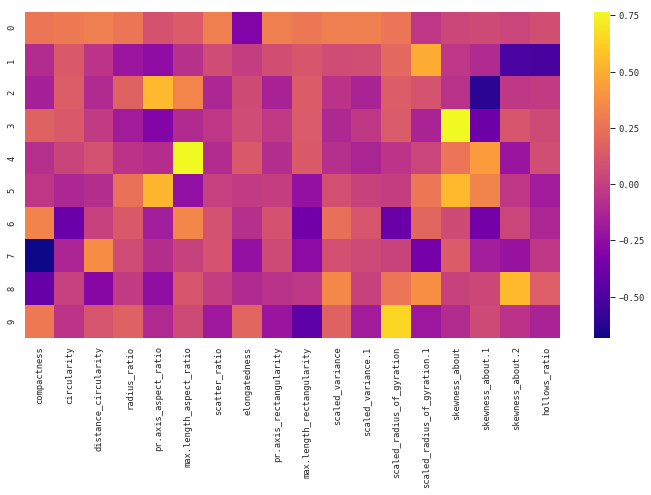

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

#### Split the data into train and test 

In [30]:
#Test train split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_reduced,y.values.ravel(),test_size=0.2,random_state=3)

### Gaussian NaiveBayes

In [31]:
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score, cross_val_predict,cross_validate
from sklearn import metrics

nb_clf = GaussianNB()

scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro'}

scores=cross_validate(nb_clf, X_train,y_train, cv=5,scoring=scoring,return_train_score=True)

print(scores.keys())

print("Cross-validated scores for train accuracy:", scores['train_acc'].mean()) 
print("Cross-validated scores for train precision:", scores['train_prec_macro'].mean()) 
print("Cross-validated scores for train recall:", scores['train_prec_macro'].mean()) 


print("\nCross-validated scores for test accuracy:", scores['test_acc'].mean()) 
print("Cross-validated scores for test precision:", scores['test_prec_macro'].mean()) 
print("Cross-validated scores for test recall:", scores['test_rec_macro'].mean()) 

# Make cross validated predictions
predictions = cross_val_predict(nb_clf, X_train,y_train, cv=5)

# Train the model (a.k.a. `fit` training data to it).
nb_clf.fit(X_train,y_train)
# Use the model to make predictions based on testing data.
y_pred_nb = nb_clf.predict(X_test)

#Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test,y_pred_nb)
cm_nb

dict_keys(['fit_time', 'score_time', 'test_acc', 'train_acc', 'test_prec_macro', 'train_prec_macro', 'test_rec_macro', 'train_rec_macro'])
Cross-validated scores for train accuracy: 0.8657593702862474
Cross-validated scores for train precision: 0.8637478473566975
Cross-validated scores for train recall: 0.8637478473566975

Cross-validated scores for test accuracy: 0.8505079179267063
Cross-validated scores for test precision: 0.8532564027020048
Cross-validated scores for test recall: 0.8263701363285761


array([[41,  2,  6],
       [ 6, 73,  3],
       [ 1, 10, 28]], dtype=int64)

### Support Vector Machine

In [32]:
from sklearn.svm import SVC
classifier_svm_kernel = SVC(C=1.0,kernel='rbf')

scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro'}

# Perform 5-fold cross validation
svm_scores = cross_validate(classifier_svm_kernel, X_train,y_train, cv=5,scoring=scoring,return_train_score=True)
print(svm_scores.keys())

print("Cross-validated scores for train accuracy:", svm_scores['train_acc'].mean()) 
print("Cross-validated scores for train precision:", svm_scores['train_prec_macro'].mean()) 
print("Cross-validated scores for train recall:", svm_scores['train_prec_macro'].mean()) 


print("\nCross-validated scores for test accuracy:", svm_scores['test_acc'].mean()) 
print("Cross-validated scores for test precision:", svm_scores['test_prec_macro'].mean()) 
print("Cross-validated scores for test recall:", svm_scores['test_rec_macro'].mean()) 

# Make cross validated predictions
predictions = cross_val_predict(classifier_svm_kernel, X_train,y_train, cv=5)

# Train the model (a.k.a. `fit` training data to it).
classifier_svm_kernel.fit(X_train,y_train)
# Use the model to make predictions based on testing data.
y_pred_svm = classifier_svm_kernel.predict(X_test)

#Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_svm)
cm

dict_keys(['fit_time', 'score_time', 'test_acc', 'train_acc', 'test_prec_macro', 'train_prec_macro', 'test_rec_macro', 'train_rec_macro'])
Cross-validated scores for train accuracy: 0.9774375046892798
Cross-validated scores for train precision: 0.9757109944802306
Cross-validated scores for train recall: 0.9757109944802306

Cross-validated scores for test accuracy: 0.9585718466491073
Cross-validated scores for test precision: 0.9569723979526294
Cross-validated scores for test recall: 0.9502989430291221


array([[48,  0,  1],
       [ 2, 78,  2],
       [ 0,  4, 35]], dtype=int64)

In [33]:
#Comparing the predictions with the actual results
comparison = pd.DataFrame(y_test,columns=['y_test'])
comparison['y_predicted'] = y_pred_svm
comparison.head()

,y_test,y_predicted
0,0,0
1,0,0
2,2,2
3,1,1
4,0,0


#### Fine tune SVM parameters using GridSearchCV

In [34]:
#Applying grid search for optimal parameters and model after k-fold validation
from sklearn.model_selection import GridSearchCV

parameters = [{'C':[0.01,0.05,0.5, 0.1,5.3], 'kernel':['rbf','linear'], 'gamma': [0.01, 0.05,0.1,0.125,0.15, 0.17, 0.5,1]}]
grid_search = GridSearchCV(estimator=classifier_svm_kernel, param_grid=parameters, scoring ='accuracy',cv=5,n_jobs=-1)
grid_search = grid_search.fit(X_train,y_train)

In [35]:
best_accuracy = grid_search.best_score_
best_accuracy

0.9630177514792899

In [36]:
opt_param = grid_search.best_params_
opt_param

{'C': 5.3, 'gamma': 0.15, 'kernel': 'rbf'}

In [37]:
y_pred = grid_search.predict(X_test)

#Compute confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)
cm

array([[48,  0,  1],
       [ 2, 80,  0],
       [ 0,  2, 37]], dtype=int64)

In [38]:
print(classification_report(y_test, y_pred, target_names = ['bus', 'car', 'van']))

              precision    recall  f1-score   support

         bus       0.96      0.98      0.97        49
         car       0.98      0.98      0.98        82
         van       0.97      0.95      0.96        39

    accuracy                           0.97       170
   macro avg       0.97      0.97      0.97       170
weighted avg       0.97      0.97      0.97       170



### Conclusion

- Most of the variables in this original dataset are highly correlated. Correlation between variables brings about a redundancy in the information , in order to reduce noise we used PCA to transform the original variables to the linear combination of these variables which are independent. 
- Based on the percentage of variation explained by each principle component, we choose to consider first 10 components as it explains close to 98.63% of variability. That is dimensionality reduction from 17 to 10, ignoring rest of the principle components.

- Here we can see that we are not loosing much information by transforming the components to a new feature space and we are able to capture most of the variance explained by these new principle components.
- With SVM we are able to classify the class with a very good precision,recall and f1-scores over Naive bayes classifier